## Introduction

In this lesson, we'll work with the movies dataset.  Our target will be the amount of revenue brought in by a movie.  And of course, we'll be using decision trees to make this prediction.

### Exploring our data

As always, we'll get started by loading up our data.  Now that data that we'll use is a [set of movie data](https://github.com/fivethirtyeight/data/tree/master/bechdel) put together by the website 538.  Because we haven't learned anything about data cleaning yet, we'll work with a cleaned up version of this data.  Time to load it up:

In [94]:
import pandas as pd
df = pd.read_csv('./imdb_movies.csv', index_col = 0)
df = df.drop(columns = ['budget'])
df[:5]

,title,genre,runtime,year,month,revenue
0,Avatar,Action,162.0,2009,12,2787965087
1,Pirates of the Caribbean: At World's End,Adventure,169.0,2007,5,961000000
2,Spectre,Action,148.0,2015,10,880674609
3,The Dark Knight Rises,Action,165.0,2012,7,1084939099
4,John Carter,Action,132.0,2012,3,284139100


Now in the data above, we'll be using `genre`, `budget`, `runtime`, `year`, and `month` as our feature columns, and `revenue` as the target that we are trying to predict.  We won't use `title` at all in our model, but it's nice to have.

Now this data is a little bit different than our previous data.  We see that our revenue data is continuous.  Believe it or not, we can train a decision tree on this type of data as well.  We'll talk about some of the differences with continuous data as a bonus in the next lesson.

But for now, let's move ahead with sklearn.  

### Follow the steps

Remember that all data in our model must be a number.  We'll turn the give each genre a corresponding number, with the following.

In [95]:
df['genre'] = df.genre.astype('category')

> Don't worry, you'll be learning all about how to do that in a future lesson.

Next we separate our data into our features, and our target.

In [56]:
X = df[['genre', 'runtime', 'year', 'month']]
y = df['revenue']

Now it's time for you to do some of the work.

Remember the steps of training our decision tree.  We first import the correct model (we do this for you).

In [61]:
from sklearn.tree import DecisionTreeRegressor

> Ok, now we use a `DecisionTreeRegressor` (as opposed to a DecisionTreeClassifier) because the revenue data is not just a $1$ or $0$, but potentially any value greater than 0.  When our data can be any value in a specified range, it's called continuous - and with continuous data we use the regressor.

Now follow the steps training a model.  First initialize our `DecisionTreeRegressor` and assign it to model.

In [62]:
model = DecisionTreeRegressor()

Then train the model, with the `fit` method.

In [63]:
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

And finally, we can make a prediction, by passing through the features of an observation.

In [64]:
observation = X[:1]

model.predict(observation)

array([2.78796509e+09])

We can also see the hypothesis function for our 

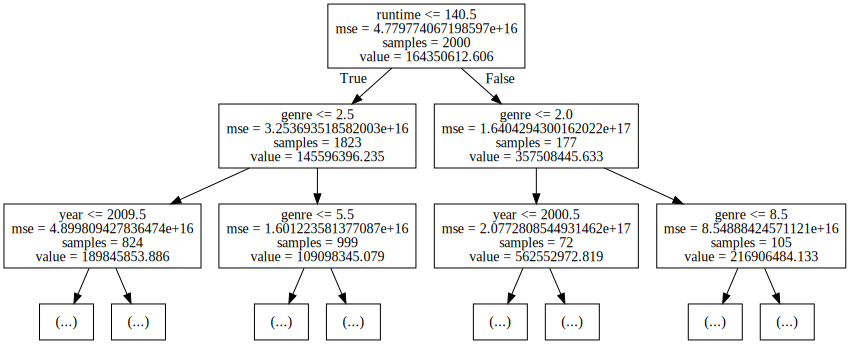

In [65]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))

For those curious, let's interpret diagram above.  The `value` on the first node at the top, is the average revenue for all movies - `164350612`.  The best split point for all of the data is whether the movie is less than or greater that 140 minutes.  Splitting the data there provides a the less than 140 minutes group having an average revenue of `145596396`, and over 140 minutes having an average of `357508445`.

Then the data is split based on whether the genre value is less than 2 or less than 2.5 -- the mapping below shows the split asks if the genre is Action, Adventure or Animation.  

The decision tree continues beyond the image, but we only printed out three levels.  A complete mapping of the numbers to genres is provided below.  

In [100]:
mapping = {0: 'Action', 1: 'Adventure', 2: 'Animation', 3: 
'Comedy', 4: 'Crime', 5: 'Drama', 6: 'Fantasy', 7: 'Horror',
 8: 'Romance', 9: 'Science Fiction', 10: 'Thriller'}

### Summary

In this lesson, we had some practice working with a real dataset.  We saw that to train a decision tree regressor we first initialize the model, then train the model on our `X` and `y` data, and then we can make a prediction for an observation, and we can display the hypothesis function.